In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 15,7

##### Описание датасета.
Для анализа взят датасет индекса экономической свободы, опубликованный в 2021 (2021 Index of Economic Freedom, https://www.heritage.org/index/) для 184 стран.

В основе индекса лежат 4 категории, представленные 12тью показателями:

 1. Rule of law:
  - Property Rights (на сколько хорошо защищены права собственности (физической и интеллектуальной), каковы риски экспроприации)
  - Judicial Effectiveness (независимость судебной системы, качество судебных процессов, фаворитизм)
  - Government Integrity (распространенность взяток, прозрачность политических решений, восприятие коррупции)


 2. Government size:
  - Tax Burden (ставки налога на доходы граждан и компаний, общая налоговая нагрузка как доля в ВВП)
  - Government Spending (уровень гос.расходов, включая гос.программы)
  - Fiscal Health (отношение среднего дефицита бюджета к ВВП за последние 3 года, доля гос.долга (накопленные дефициты бюджета) к ВВП)
 
 
 3. Regulatory efficiency:
  - Business Freedom (организация бизнеса (количесто процедур, сроки, расходы, мин.капитал), получение лицензий (количесто процедур, сроки, расходы), сроки закрытия бизнеса и т.д.)
  - Labor Freedom (соотношение минимальной з/п к средней добавленной стоимости на одного сотрудника, барьеры для найма дополнительного сотрудника, негибкость рабочих часов, сложность увольнения сотрудников, законодательно устаноленный период, в течение которого сотрудник должен быть уведомлен об увольнении, уроень обязательного пособия при увольнении, доля экономически актиного населения)
  - Monetary Freedom (средневзвешенная ставка инфляции за предшествовавшие 3 года, количественная оценка объема государственного манипулирования ценами путем прямого контроля или через субсидии)
 
 
 4. Market openness:
  - Trade Freedom (средняя импортная пошлина, вызвешенная на долю импорта каждой группы товаров, количественная оценка нетарифицируемых барьеров (количестенные ограничения/квоты, регуляторные ограничения (лицензирование, сан.-эпидем.стандарты и пр.), ограничения, связанные с клиентами (необходимость депозита, процедуры по оценке клиентов и пр.), прямое гос.вмешательство (субсидии, гос.монополии, регулирование конкуренции и пр.))
  - Investment Freedom (национальный режим, принятый для иностранных инвестиций, законодательство в этой области, ограничения на владение землей, секторальные ограничения, лишение права собственности без справедливой компенсации, валютный контроль, контроль за перемещением капитала)
  - Financial Freedom (уровень зарегулированности сектора финансовых услуг, спепень гос.вмешательства в деятельность банков и компаний финансового сектора через прямое или непрямое владение, гос.влияние на распределение кредитов, развитость финасового сектора и рынка привлечения капитала, готовность к конкуренции с иностранными компаниями)
  
Каждый показатель рассчитывается по определенной формуле (чем выше балл, тем лучше). Итоговый индекс рассчитывается как среднее от 12ти показателей.

In [2]:
IEF = pd.read_excel('index2021_data.xls')
IEF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CountryID                        184 non-null    int64  
 1   Country_Name                     184 non-null    object 
 2   WEBNAME                          184 non-null    object 
 3   Region                           184 non-null    object 
 4   World_Rank                       178 non-null    float64
 5   Region_Rank                      178 non-null    float64
 6   2021_Score                       178 non-null    float64
 7   Property_Rights                  183 non-null    float64
 8   Judical_Effectiveness            183 non-null    float64
 9   Government_Integrity             183 non-null    float64
 10  Tax_Burden                       178 non-null    float64
 11  Government_Spending              181 non-null    float64
 12  Fiscal_Health         

##### 1. Корреляция между индексом и ВВП на душу населения.

Text(108000, 51, 'Each data point \nrepresents a nation')

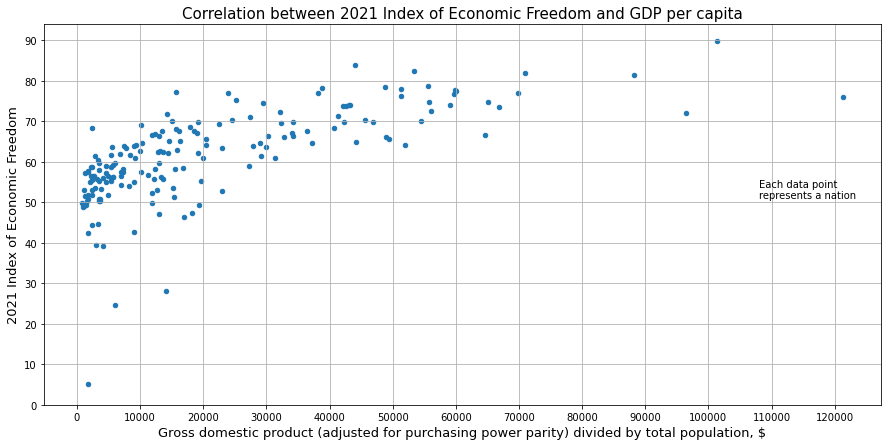

In [3]:
IEF.plot(kind='scatter',
        x='GDP_per_Capita_(PPP)',
        y='2021_Score',
        grid=True,
        yticks=range(0, 100, 10),
        xticks=range(0, 130000, 10000))

plt.xlabel('Gross domestic product (adjusted for purchasing power parity) divided by total population, $', fontsize=13)
plt.ylabel('2021 Index of Economic Freedom', fontsize=13)
plt.title('Correlation between 2021 Index of Economic Freedom and GDP per capita', fontsize=15)
plt.text(108000, 51, 'Each data point \nrepresents a nation')

На основе предсталенных данных можно выдвинуть гипотезу о том, что страны с более высоким уровнем индекса экономической свободы (ИЭС) имеют более высокие доходы на душу населения. Для того, чтобы более наглядно показать взаимосвязь уровня дохода и ИЭС, группируем страны по ИЭС по категориям, предложенным The Heritage Foundation (автор индекса), и рассчитаем средний уровень дохода для каждой группы.

##### 2. Средний ВВП на душу населения в разрезе категорий стран (определены на основе уровня ИЭС).

In [3]:
def ranking(row):
    """
    Функция классифицирует страны по ИЭС по категориям: free, mostly free, moderately free, mostly unfree, repressed.
    """
    if row > 80:
        return 'Free'
    elif row > 70:
        return 'Mostly free'
    elif row > 60:
        return 'Moderately free'
    elif row > 50:
        return 'Mostly unfree'
    elif row > 0:
        return 'Repressed'    

In [4]:
# применяем функцию к 2021_Score, где указан ИЭС по странам, добавляя новый столбец Ranking
IEF['Ranking'] = IEF['2021_Score'].apply(ranking)
IEF.head()

,CountryID,Country_Name,WEBNAME,Region,World_Rank,Region_Rank,2021_Score,Property_Rights,Judical_Effectiveness,Government_Integrity,...,Population_(Millions),GDP_(Billions_PPP),GDP_Growth_Rate_(%),5_Year_GDP_Growth_Rate_(%),GDP_per_Capita_(PPP),Unemployment_(%),Inflation_(%),FDI_Inflow_(Millions),Public_Debt_(%_of_GDP),Ranking
0,1,Afghanistan,Afghanistan,Asia-Pacific,146.0,33.0,53.0,30.3,25.7,29.1,...,38.041754,76.624,3.037,2.3484,2293.551684,11.1,2.302,38.533333,7.3,Mostly unfree
1,2,Albania,Albania,Europe,66.0,35.0,65.2,46.1,22.8,40.6,...,2.854191,39.832,2.214,3.1242,14495.078514,12.3,1.411,1281.252239,68.8,Moderately free
2,3,Algeria,Algeria,Middle East and North Africa,162.0,13.0,49.7,34.0,41.6,32.7,...,43.053054,668.827,0.700,2.0600,11820.087684,11.7,1.952,1381.890090,46.3,Repressed
3,4,Angola,Angola,Sub-Saharan Africa,140.0,30.0,54.2,30.3,22.8,20.4,...,31.825295,200.830,-1.503,-0.8978,6929.678158,6.9,17.079,-4098.478748,109.8,Mostly unfree
4,5,Argentina,Argentina,Americas,148.0,26.0,52.7,46.1,45.7,54.0,...,44.938712,911.562,-2.163,-0.2650,22947.139795,9.8,53.548,6244.423000,88.7,Mostly unfree


In [5]:
# группирую по категориям и рассчитываю среднее для каждой из них
ranking_by_av_income = IEF[['Ranking', 'GDP_per_Capita_(PPP)']].groupby('Ranking').mean().reset_index()
ranking_by_av_income

,Ranking,GDP_per_Capita_(PPP)
0,Free,71575.750387
1,Moderately free,22004.583936
2,Mostly free,47705.841379
3,Mostly unfree,6833.668757
4,Repressed,7162.568273


Text(0, 0.5, 'Average GDP per Capita (PPP), $')

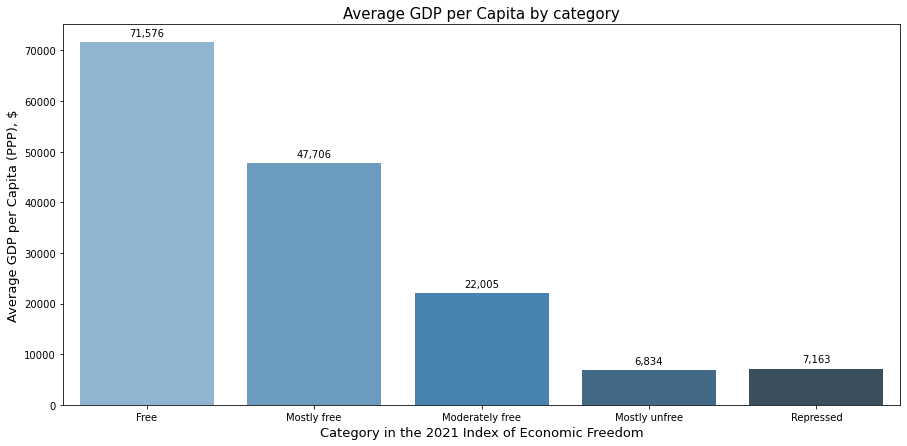

In [7]:
categories_order = ['Free', 'Mostly free', 'Moderately free', 'Mostly unfree', 'Repressed']
ax = sns.barplot(data=ranking_by_av_income, x='Ranking', y='GDP_per_Capita_(PPP)', order=categories_order,
                palette='Blues_d')

# подпись для каждой категории:
for p in ax.patches:
    ax.annotate(format(p.get_height(), ',.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

ax.set_title('Average GDP per Capita by category', fontsize=15)
ax.set_xlabel('Category in the 2021 Index of Economic Freedom', fontsize=13)
ax.set_ylabel('Average GDP per Capita (PPP), $', fontsize=13)

Действительно, страны с наибольшим ИЭС (категория Free) в среднем имеют в 1.5 раза более высокий ВВП на душу населения, чем те, которые попали  категорию Mostly free. Далее разрыв в доходах между категориям увеличивается еще более значительно:
 - ВВП на душу населения в странах, входящих в категорию Mostly free, более чем в 2 раза превышает аналогичный показатель для стран Moderately Free;
 - средний ВВП на душу населения в странах Mostly unfree и Repredsed примерно в 3 раза отстает от среднего уровня в странах Moderately free.

Страны с более высоким уровнем дохода граждан (если принять, что ВВП на душу населения связан с уровнем благосостояния населения) имеют больше экономической свободы за счет менее зарегулированных рынков, верховенства права, не слишком высокого уровня вмешательства государства в экономику. Однако, вопрос о том, что является первичным - институты (законодательство, правила, регулирование) или уровень доходов - является предметом научной дискусиии.

Россия занимает 92 место в рейтинге 2021 года с ИЭС=61.5. Рассмотрим место России в ИЭС в контексте "соседей" - стран с аналогичным уровнем индекса (для целей анализа установим уровень ИЭС в пределах 60 - 63).

##### 3. Соседи России по ИЭС.

In [8]:
IEF.loc[IEF.Country_Name == 'Russia']

,CountryID,Country_Name,WEBNAME,Region,World_Rank,Region_Rank,2021_Score,Property_Rights,Judical_Effectiveness,Government_Integrity,...,Population_(Millions),GDP_(Billions_PPP),GDP_Growth_Rate_(%),5_Year_GDP_Growth_Rate_(%),GDP_per_Capita_(PPP),Unemployment_(%),Inflation_(%),FDI_Inflow_(Millions),Public_Debt_(%_of_GDP),Ranking
136,136,Russia,Russia,Europe,92.0,42.0,61.5,54.4,42.4,41.7,...,144.373535,4389.96,1.336,0.7992,29181.363218,4.6,4.47,31735.139,14.0,Moderately free


Text(30000, 24, 'Russia')

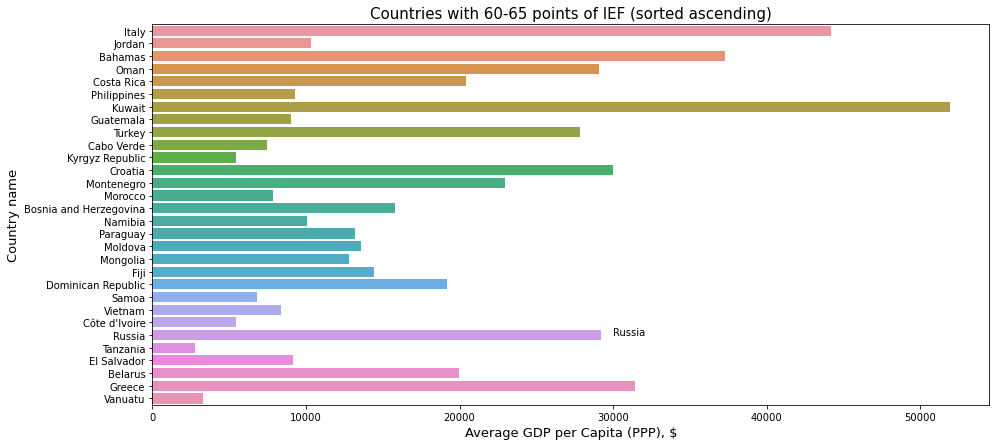

In [9]:
# фильтруем по ИЭС 60-63, сортируем по убыванию
appox_russia = IEF[(IEF['2021_Score'] > 60) & (IEF['2021_Score'] < 65)].sort_values(by='World_Rank')

ax2 = sns.barplot(x='GDP_per_Capita_(PPP)',
                 y='Country_Name',
                 data=appox_russia,
                 orient='h') 

ax2.set_title('Countries with 60-65 points of IEF (sorted ascending)', fontsize=15)
ax2.set_xlabel('Average GDP per Capita (PPP), $', fontsize=13)
ax2.set_ylabel('Country name', fontsize=13)
plt.text(30000, 24, 'Russia')

На графике видно, что Россия находится среди стран в основном с более низким уровнем ВВП на душу населения (чем ниже на графике, тем ниже ИЭС). Т.е. можно предположить, что страны с аналогичным уровнем ВВП находятся выше по ИЭС.

Ниже рассмотрим динамику ИЭС для России.

##### 4. Динамика ИЭС и его составляющих для России.

In [12]:
# ИЭС для России по годам
russia = pd.read_csv('Russia.csv')
russia

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Russia,2021,61.5,54.4,41.7,42.4,93.0,66.1,99.6,84.1,55.4,67.3,74.0,30.0,30.0
1,Russia,2020,61.0,56.8,41.3,44.4,88.5,63.8,98.7,80.2,52.1,68.2,77.8,30.0,30.0
2,Russia,2019,58.9,52.4,36.6,45.1,89.4,62.3,86.6,78.4,52.5,65.1,77.8,30.0,30.0
3,Russia,2018,58.2,48.7,38.1,46.9,85.8,62.5,87.7,77.0,52.0,60.8,79.4,30.0,30.0
4,Russia,2017,57.1,47.6,38.2,44.5,81.8,61.5,93.4,74.8,50.8,57.3,75.2,30.0,30.0
5,Russia,2016,50.6,20.0,27.0,NaN,82.2,56.2,NaN,72.2,57.6,62.9,72.4,25.0,30.0
6,Russia,2015,52.1,20.0,28.0,NaN,86.1,57.8,NaN,76.3,58.9,63.9,75.0,25.0,30.0
7,Russia,2014,51.9,25.0,22.1,NaN,85.6,61.5,NaN,70.0,55.8,69.4,74.6,25.0,30.0
8,Russia,2013,51.1,25.0,24.0,NaN,86.9,54.4,NaN,69.2,52.6,66.7,77.4,25.0,30.0
9,Russia,2012,50.5,25.0,21.0,NaN,82.5,48.6,NaN,65.1,63.5,66.3,68.2,25.0,40.0


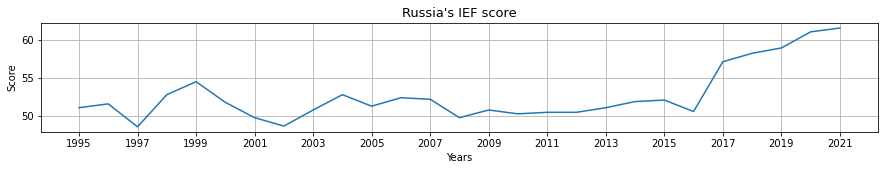

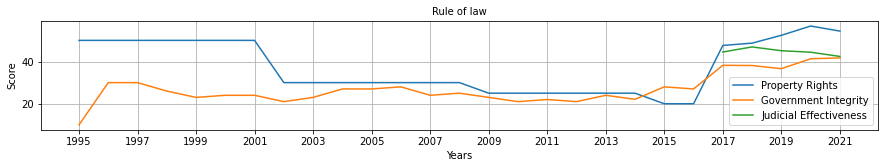

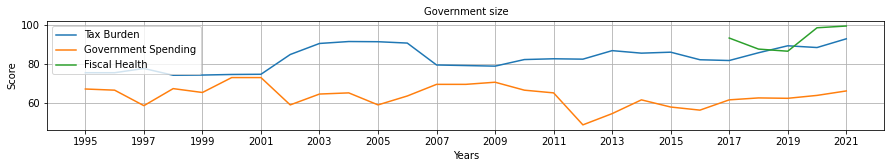

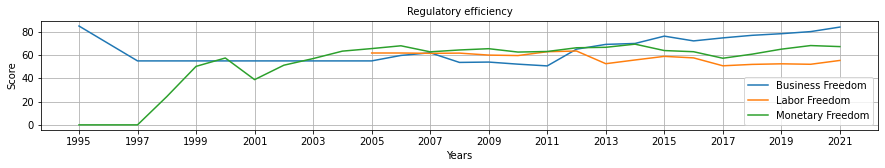

Text(0.5, 1.0, 'Market openness')

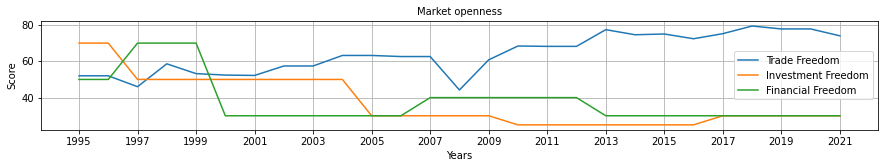

In [11]:
rcParams['figure.figsize'] = 15,2

# динамика ИЭС для России
russia.plot(kind='line', x='Index Year', y='Overall Score', legend=False, grid=True, xticks=range(1995, 2022, 2))

plt.xlabel('Years', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.title("Russia's IEF score", fontsize=13)
plt.show()

# Rule of law
russia.plot(kind='line', 
            x='Index Year', 
            y=['Property Rights', 'Government Integrity', 'Judicial Effectiveness'], 
            grid=True, 
            xticks=range(1995, 2022, 2))
plt.xlabel('Years', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.title('Rule of law', fontsize=10)
plt.show()

# Government size
russia.plot(kind='line', 
            x='Index Year', 
            y=['Tax Burden', 'Government Spending', 'Fiscal Health'], 
            grid=True, 
            xticks=range(1995, 2022, 2))
plt.xlabel('Years', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.title('Government size', fontsize=10)
plt.show()

# Regulatory efficiency
russia.plot(kind='line', 
            x='Index Year', 
            y=['Business Freedom', 'Labor Freedom', 'Monetary Freedom'], 
            grid=True, 
            xticks=range(1995, 2022, 2))
plt.xlabel('Years', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.title('Regulatory efficiency', fontsize=10)
plt.show()

# Market openness
russia.plot(kind='line', 
            x='Index Year', 
            y=['Trade Freedom', 'Investment Freedom', 'Financial Freedom'], 
            grid=True, 
            xticks=range(1995, 2022, 2))
plt.xlabel('Years', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.title('Market openness', fontsize=10)

ИЭС России в целом показывает рост в последние годы. С 2016 по 2021 ИЭС увеличился на 10.9 пункта (с 50.6 до 61.5). 

На графике видно, что в 2017 произошел резкий рост следующих показателей:
 - Property Rights на 27.6 (с 20 в 2016 до 47.6 в 2017),
 - Government Integrity на 11.2 (с 27 в 2016 до 38.2 в 2017).

Согласно информации, размещенной на сайте The Heritage Foundation, в 2017 произошло изменение методологии* определения некоторых показателей в том числе Property Rights и Government Integrity. Так что рост показателя скорее технический, чем качественный.

Высокий уровень показателя Tax Burden связан с относительно невысокими ставками НДФЛ и корпоративного налога на прибыль, а также умеренной долей налогов и сборов в ВВП.
В свою очередь показатель Fiscal Health отпределяет уровень гос.долга в ВВП и дефицит бюджета за последние 3 года. Соответственно чем выше показатель, тем ниже долг. У России в этом отношении все в порядке, страна имеет низкий уровень закредитованности.

В целом России уже два года подряд находится в нижнем сегменте категории стран Mostly free (порог > 60 поинтов). За последний год рост рейтинг России подрос 0.5, что в принципе, на мой взгляд, находится на уровне погрешности. 


*Методология 2017 на сайте не достуна. Но сравнение методологии 2016 и 2018 годов показвает разницу подходов.

###### 5. Влияние изменения каждого из 12ти показателей с 2017 по 2021 на ИЭС России.

In [54]:
# отбираю необходтимые столбцы, рассчитываю изменение по сравнению с предыдущим годом с помощью метода diff
# транспонируем данные для большей наглядности в heatmap
sample = russia.iloc[:5, [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]].set_index('Index Year').diff(periods=-1).T

# убираю 2017 год, т.к. от него идет сравнение
sample.iloc[:, :4]

Index Year,2021,2020,2019,2018
Property Rights,-2.4,4.4,3.7,1.1
Government Integrity,0.4,4.7,-1.5,-0.1
Judicial Effectiveness,-2.0,-0.7,-1.8,2.4
Tax Burden,4.5,-0.9,3.6,4.0
Government Spending,2.3,1.5,-0.2,1.0
Fiscal Health,0.9,12.1,-1.1,-5.7
Business Freedom,3.9,1.8,1.4,2.2
Labor Freedom,3.3,-0.4,0.5,1.2
Monetary Freedom,-0.9,3.1,4.3,3.5
Trade Freedom,-3.8,0.0,-1.6,4.2


Text(0.5, 1.0, "Changes in Russia's IEF, current year vs previous year")

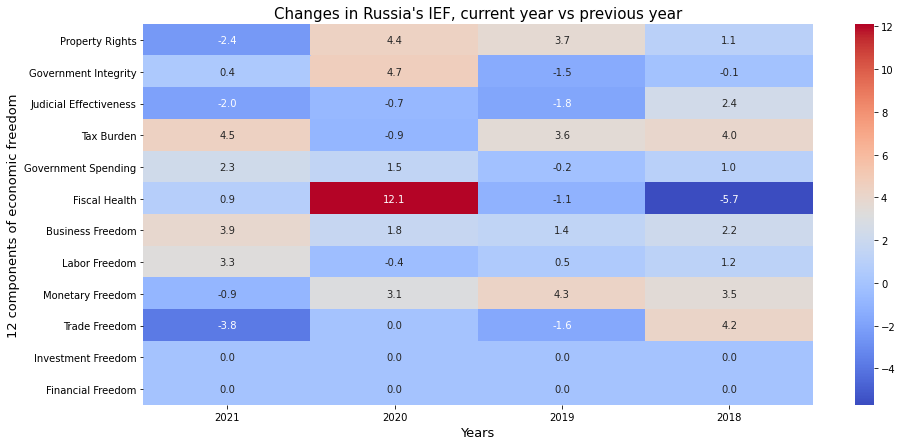

In [64]:
sns.heatmap(sample.iloc[:, :4], cmap='coolwarm', annot=True, fmt=".1f")

rcParams['figure.figsize'] = 15,7
plt.xlabel('Years', fontsize=13)
plt.ylabel('12 components of economic freedom', fontsize=13)
plt.title("Changes in Russia's IEF, current year vs previous year", fontsize=15)

В индексе 2021 года у России не наблюдалось значительных изменений в 12 показателях. В 2020 наиболее заметный рост произошел в показателе Fiscal Health. Как уже упоминалось выше данный показатель обратно пропорционален уровню гос.долга в ВВП и объему дефицита бюджета за последние 3 года. И т.к. индекс ретроспективный (т.е. ИЭС 2020 учитывает показатели 2019 года), то в 2020 показатель Fiscal Health учитывал низкий уровень гос.долга и профицитный бюджет 2019**.

В основном показатели колебались в пределах 2-4. И в целом показывали скорее рост, чем снижение. 

**Бюджет РФ в 2019 году исполнен с профицитом 1,8% ВВП (https://www.interfax.ru/business/691856)

###### 6. Мировой разброс 12 показателей, входящих в ИЭС.

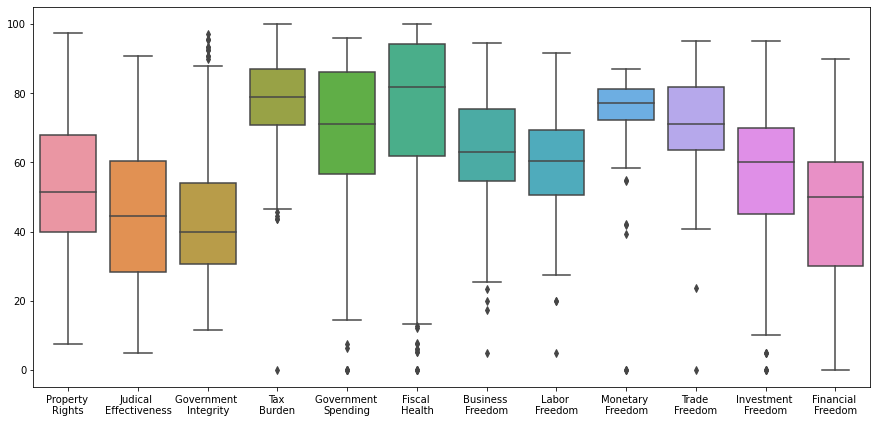

In [7]:
# фильтруем данные, чтобы оставить только 12 показателей, состаляющих ИЭС
df = IEF.iloc[:, 7:19]

# изменяем названия колонок для наглядности
df.columns = ['Property \nRights', 
              'Judical \nEffectiveness', 
              'Government \nIntegrity', 
              'Tax \nBurden', 
              'Government \nSpending',
              'Fiscal \nHealth', 
              'Business \nFreedom', 
              'Labor \nFreedom', 
              'Monetary \nFreedom', 
              'Trade \nFreedom', 
              'Investment \nFreedom', 
              'Financial \nFreedom']

sns.boxplot(data=df)

rcParams['figure.figsize'] = 16,10

Показатель Fiscal Health имеет самую высокую медиану, значит большинство стран включенных в ИЭС имеют низкий уровень гос.долга и незначительный дефицит бюджета (либо профицит). В то же время длина усов ящика говорит о значительном разбросе данного показателя среди представленных стран. В целом показатели группы Government size (Tax Burden, Government Spending, Fiscal Health) выше, чем у других групп. Рискну предположить, что основные причины лежат в более менее устойчивой центральной власти государств, которая справляется со сбором налогов (Tax Burden), занимается распределением средств, полученных от налогов (Government Spending) и способно удерживать гос.долг на приемлемом уровне.

Минимальное значение медианы зафиксировано у показателя Government Integrity, который характеризует уровень коррупции и открытости государственных институтов. Высокий уровень Government Integrity имеют только отдельные страны, на графике представлены в виде выбросов. Таким образом, можно говорить о том, что общий уровень коррупции в мире остается довольно высоким. Все показатели группы Rule of law (Property Rights, Judical Effectiveness, Government Integrity) в среднем ниже, чем у прочих групп. Показатели данной группы очерчивают законодательную и институциональную рамку, необходимую для долгосрочного устойчивого развития экономики. Отсутствие должного уровня защищенности прав собственности (Property Rights) не дает инвестору уверенности в том, что он сможет долго владеть и распоряжаться своим имуществом/интелектуальной собственностью. Низкий уровень Judical Effectiveness приводит к том, что инвесторам сложно отставить свои права в суде. Все это влияет на горизонт планирования и увеличивает риски бизнеса.

Рассматривая показатели в целом можно сделать вывод о том, что государства являются в большинстве совем сильными и централизованными. Однако, недостаток эффективных институтов делает сами государства основнми игроками на рынке, не позволяя гражданам в полной мере реализовывать свои экономические права.